<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/04_MNIST_%EC%86%90%EA%B8%80%EC%94%A8_0~9%EA%B9%8C%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터셋을 활용한 손글씨 (0~9) 예측하는 다중분류

## MNIST 데이터셋 준비하기

In [ ]:
from keras.datasets.mnist import load_data

#케라스 저장소에서 데이터 다운로드
(X_train, y_train), (X_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


## MNIST 데이터 형태 확인하기

### 훈련 데이터셋

In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_train ',y_train)

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
y_train  [5 0 4 ... 5 6 8]


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### 테스트 데이터 셋

In [ ]:
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)
print('y_test ',y_test)

X_test.shape :  (10000, 28, 28)
y_test.shape :  (10000,)
y_test  [7 2 1 ... 4 5 6]


In [ ]:
print(X_test.shape, y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


## 데이터 그려보기

<function matplotlib.pyplot.show(close=None, block=None)>

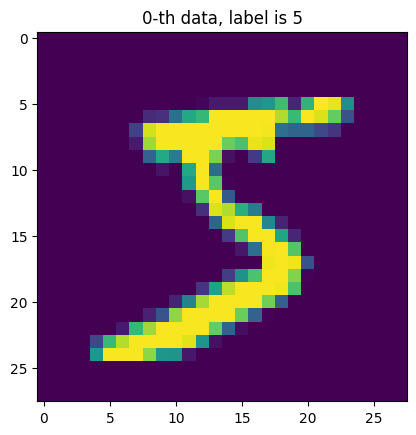

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx = 0
img = X_train[idx, :]
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' %(idx,label))
plt.show

## 검증 데이터셋 만들기

In [ ]:
# 훈련데이터셋 -> 훈련(70%), 검증(30%) 비율로 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)
print('X_train.shape',X_train.shape)
print('X_val.shape',X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


In [ ]:
print('X_train.shape',X_train.shape)
print('X_val.shape',X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


## 모델 입력을 위한 데이터 (손글씨) 전처리

*   2차원 배열(28,28) -> 1차원 배열(784)로 변경
*   스케일링(범위축소) -> 0 ~ 255  ->  0 ~ 1



### 2차원 배열에서 1차원 배열로 변경

In [ ]:
num_x_train = X_train.shape[0]
num_x_val = X_val.shape[0]
num_x_test = X_test.shape[0]

print(num_x_train, num_x_val, num_x_test)

42000 18000 10000


In [ ]:
X_trian = X_train.reshape(num_x_train, 28 * 28)
X_trian.shape

(42000, 784)

In [ ]:
X_val = X_val.reshape(num_x_val, 28 * 28)
X_val.shape

(18000, 784)

In [ ]:
X_test = X_test.reshape(num_x_test, 28 * 28)
X_test.shape

(10000, 784)

## 데이터 스케일링(범위 축소)

In [ ]:
# 데이터의 범위가 동일 (0 ~ 255) -> (0 ~ 1)

X_train = X_trian/255
X_val = X_val/255
X_test = X_test/255

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 모델 입력을 위한 레이블(정답) 전처리

In [ ]:
from keras.utils import to_categorical

print(y_train.shape,y_train[0])

#수치형 데이터(0 ~ 9) -> 범주형 데이터 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print(y_train.shape,y_train[0])


(42000,) 1
(42000, 10) [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) # 마지막 레이어 -> 출력 (레이블 shape과 동일)

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam', # 옵티마이저
              loss='categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

## 모델학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 10s 19ms/step - loss: 0.4953 - acc: 0.8559 - val_loss: 0.2605 - val_acc: 0.9264
Epoch 2/30
329/329 [==============================] - 6s 18ms/step - loss: 0.2048 - acc: 0.9403 - val_loss: 0.1907 - val_acc: 0.9464
Epoch 3/30
329/329 [==============================] - 4s 14ms/step - loss: 0.1558 - acc: 0.9545 - val_loss: 0.1598 - val_acc: 0.9553
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.1273 - acc: 0.9615 - val_loss: 0.1485 - val_acc: 0.9576
Epoch 5/30
329/329 [==============================] - 5s 14ms/step - loss: 0.1064 - acc: 0.9686 - val_loss: 0.1329 - val_acc: 0.9623
Epoch 6/30
329/329 [==============================] - 4s 13ms/step - loss: 0.0908 - acc: 0.9729 - val_loss: 0.1337 - val_acc: 0.9625
Epoch 7/30
329/329 [==============================] - 3s 10ms/step - loss: 0.0781 - acc: 0.9770 - val_loss: 0.1214 - val_acc: 0.9653
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - 

## 모델 학습 결과 분석

*   Epoch 5 이후 과대적합 됨
*   검증 데이터셋의 손실값은 상승하고, 훈련셋과 검증셋의 정확도의 거리가 점점 벌어짐
*   Epoch 5까지만 학습시킨 모델로 평가 진행


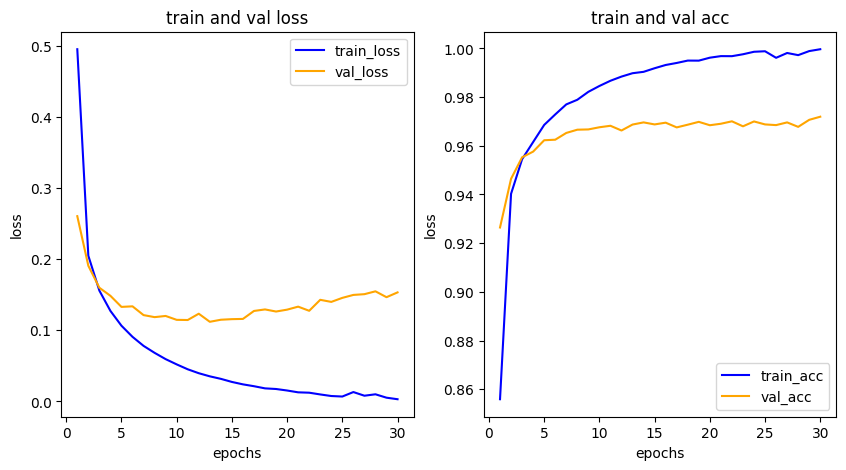

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 수정 및 학습

In [ ]:
# 모델 구성
md_model = Sequential()
md_model.add(Dense(64,activation='relu',input_shape=(784,))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
md_model.add(Dense(32,activation='relu'))
md_model.add(Dense(10,activation='softmax')) # 마지막 레이어 -> 출력 (레이블 shape과 동일)

#모델 설정
md_model.compile(optimizer='adam', # 옵티마이저
              loss='categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

#모델 학습
history = md_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
329/329 [==============================] - 5s 11ms/step - loss: 0.4724 - acc: 0.8654 - val_loss: 0.2557 - val_acc: 0.9269
Epoch 2/5
329/329 [==============================] - 3s 10ms/step - loss: 0.2039 - acc: 0.9408 - val_loss: 0.1938 - val_acc: 0.9438
Epoch 3/5
329/329 [==============================] - 3s 8ms/step - loss: 0.1564 - acc: 0.9535 - val_loss: 0.1609 - val_acc: 0.9526
Epoch 4/5
329/329 [==============================] - 3s 8ms/step - loss: 0.1271 - acc: 0.9621 - val_loss: 0.1455 - val_acc: 0.9587
Epoch 5/5
329/329 [==============================] - 2s 6ms/step - loss: 0.1072 - acc: 0.9688 - val_loss: 0.1365 - val_acc: 0.9613


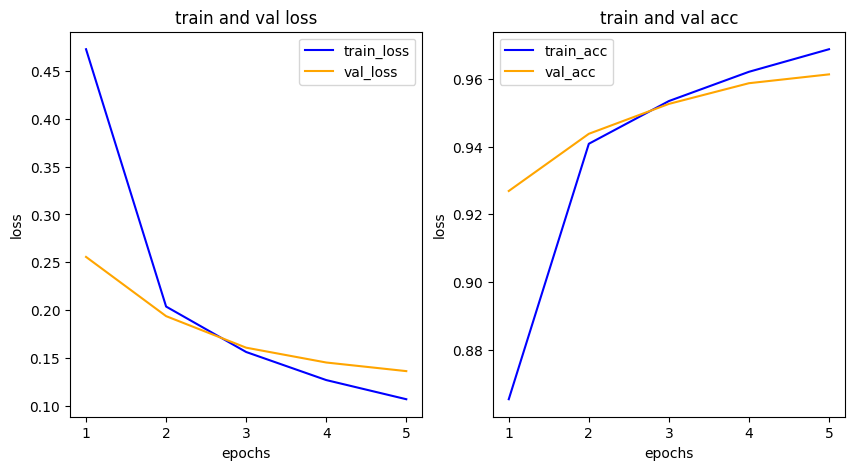

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
md_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1282 - acc: 0.9614


[0.1281576156616211, 0.9613999724388123]

### 예측값을 그려서 손글씨 확인하기

313/313 [==============================] - 1s 3ms/step


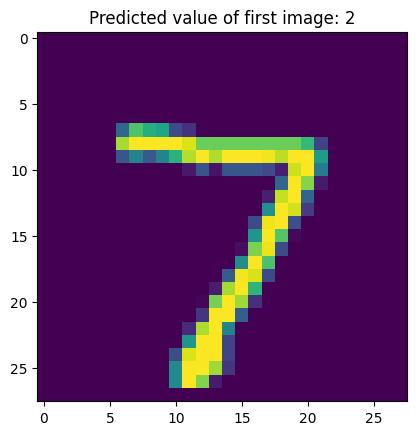

In [ ]:
results = md_model.predict(X_test)
arg_results = np.argmax(results, axis=1) #가장 큰 값의 인덱스 리턴
plt.imshow(X_test[0].reshape(28,28))
plt.title('Predicted value of first image: ' + str(arg_results[1]))
plt.show()

## 모델 평가방법 - 혼동 행렬

*   정확도가 떨어지는(헷갈리는) 손글씨 확인
*   숫자 5에 대한 데이터를 추가 수집하여, 재학습



313/313 [==============================] - 1s 4ms/step


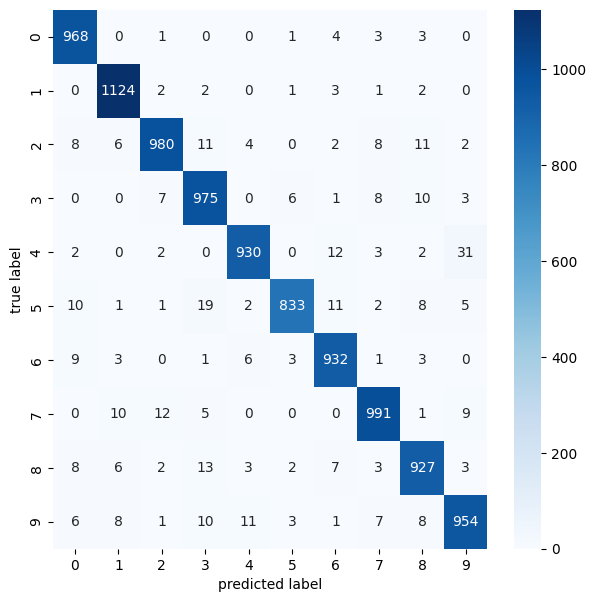

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#모델 예측
y_pred = md_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## 모델 평가 방법 - 분류 보고서

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1)))


               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.98      0.93      0.96       892
           6       0.96      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 모델 성능지표 확인


*   micro : 각각의 TP, FN, FP, TN 값들을 모두 합친 Total TP, FN, FP, TN 값들을 이용해 계산
*   macro : 각각의 클래스에 따라 TP, FN, FP, TN 값들을 이용해서 평가지표를 계산한 후 그 값들의 평균을 사용
*   weighted : 각 클래스에 해당하는 data 개수에 가중치를 주어 평균을 구하는 것



In [ ]:
from  sklearn import metrics

#모델 예측
results = md_model.predict(X_test)

y_pred = np.argmax(results, axis=1)
y_true = np.argmax(y_test, axis=1)

precision_micro = metrics.precision_score(y_true, y_pred, average = 'micro')
precision_macro = metrics.precision_score(y_true, y_pred, average = 'macro')
precision_weighted = metrics.precision_score(y_true, y_pred, average = 'weighted')

print('precision_score')
print('micro : ', precision_micro)
print('macro : ', precision_macro)
print('weighted : ', precision_weighted)
print('-' * 50)

recall_micro = metrics.recall_score(y_true, y_pred, average = 'micro')
recall_macro = metrics.recall_score(y_true, y_pred, average = 'macro')
recall_weighted = metrics.recall_score(y_true, y_pred, average = 'weighted')

print('recall_score')
print('micro : ', recall_micro)
print('macro : ', recall_macro)
print('weighted : ', recall_weighted)
print('-' * 50)

f1_micro = metrics.f1_score(y_true, y_pred, average = 'micro')
f1_macro = metrics.f1_score(y_true, y_pred, average = 'macro')
f1_weighted = metrics.f1_score(y_true, y_pred, average = 'weighted')

print('f1_score')
print('micro : ', f1_micro)
print('macro : ', f1_macro)
print('weighted : ', f1_weighted)

313/313 [==============================] - 1s 2ms/step
precision_score
micro :  0.9614
macro :  0.9616352825607489
weighted :  0.9615881521874633
--------------------------------------------------
recall_score
micro :  0.9614
macro :  0.9608029627234741
weighted :  0.9614
--------------------------------------------------
f1_score
micro :  0.9614
macro :  0.961075333311792
weighted :  0.9613557100797869
